# Exercici 1
> Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import warnings
warnings.filterwarnings("ignore")

El text a analitzar és el del següent link, el cual parla sobre les possibilitats de l'equip de futbol Arsenal d'arribar a la final de la Champions League per jugar contra el Barcelona. He extret només una part del text. La resposta a aquesta pregunta que es fa la redactora "Can Arsenal repeat their first-leg heroics at the Emirates to stave off Wolfsburg?"

[article](https://www.skysports.com/football/news/12040/12868029/arsenal-women-vs-wolfsburg-women-can-gunners-emulate-first-leg-heroics-to-secure-spot-in-womens-champions-league-final-against-barcelona)

_aquest article es va publicar el dia Monday 1 May 2023 17:11, UK by Maryam Naz_

In [2]:
# Creat a new variable with the text
article = """The hosts have fallen short in two previous attempts to get past Wolfsburg in the Champions League. Ten years ago, in the 2012/13 semi-finals, English teams did not have such strength to drawn upon in their squad against European counterparts.

Last season's exit, however, isn't as excusable. While the Londoners salvaged a 1-1 draw late in the first leg of the quarter-final, in the reverse tie, they were undone by goals in each half, one of which was an own goal from Leah Williamson.

Jonas Eidevall's team had shown a worrying frailty in that fixture; but this season, they have discovered a renewed sense of determination, despite the absence of key starters to injuries."

No Beth Mead, Vivianne Miedema, Kim Little, and most recently, Williamson has left Arsenal severely depleted. And yet, they came from behind to win against Chelsea in the Continental Cup final, Manchester City in the league, and Bayern Munich in the previous round of the Champions League.

They have not wavered from their battle plan, even with the injury crisis and shortage of replacements. That much was evident last week in Wolfsburg. Two early goals from Ewa Pajor and Sveindis Jane Jonsdottir might have deflated any other side. But the Gunners fought their way back over the precipice thanks to Rafaelle Souza and Stina Blackstenius's efforts.

They'll need to rediscover their bravery at the Emirates on Monday in front of what is looking to be a sell-out crowd.
"""

# Show text in the output
print(article)


The hosts have fallen short in two previous attempts to get past Wolfsburg in the Champions League. Ten years ago, in the 2012/13 semi-finals, English teams did not have such strength to drawn upon in their squad against European counterparts.

Last season's exit, however, isn't as excusable. While the Londoners salvaged a 1-1 draw late in the first leg of the quarter-final, in the reverse tie, they were undone by goals in each half, one of which was an own goal from Leah Williamson.

Jonas Eidevall's team had shown a worrying frailty in that fixture; but this season, they have discovered a renewed sense of determination, despite the absence of key starters to injuries."

No Beth Mead, Vivianne Miedema, Kim Little, and most recently, Williamson has left Arsenal severely depleted. And yet, they came from behind to win against Chelsea in the Continental Cup final, Manchester City in the league, and Bayern Munich in the previous round of the Champions League.

They have not wavered from t

### Preprocessat

1. Tokenization -> separar el text per paraules o frases (o tokens individuals).
2. Stop words -> remoure paraules comunes del llenguatge (and, the, etc).
3. Stemming & Lemmatization -> reduir les paraules a la seva arrel (forma base/verb).

In [3]:
# Separate text in sentence
article_toks = sent_tokenize(article)
print(article_toks)

['The hosts have fallen short in two previous attempts to get past Wolfsburg in the Champions League.', 'Ten years ago, in the 2012/13 semi-finals, English teams did not have such strength to drawn upon in their squad against European counterparts.', "Last season's exit, however, isn't as excusable.", 'While the Londoners salvaged a 1-1 draw late in the first leg of the quarter-final, in the reverse tie, they were undone by goals in each half, one of which was an own goal from Leah Williamson.', 'Jonas Eidevall\'s team had shown a worrying frailty in that fixture; but this season, they have discovered a renewed sense of determination, despite the absence of key starters to injuries."', 'No Beth Mead, Vivianne Miedema, Kim Little, and most recently, Williamson has left Arsenal severely depleted.', 'And yet, they came from behind to win against Chelsea in the Continental Cup final, Manchester City in the league, and Bayern Munich in the previous round of the Champions League.', 'They hav

In [4]:
# Separate text in words
article_tokw=word_tokenize(article.lower())

# Eliminate punctuation marks
article_tokw = [token for token in article_tokw if token.isalpha()]

# Show filtered article text
print(article_tokw)

['the', 'hosts', 'have', 'fallen', 'short', 'in', 'two', 'previous', 'attempts', 'to', 'get', 'past', 'wolfsburg', 'in', 'the', 'champions', 'league', 'ten', 'years', 'ago', 'in', 'the', 'english', 'teams', 'did', 'not', 'have', 'such', 'strength', 'to', 'drawn', 'upon', 'in', 'their', 'squad', 'against', 'european', 'counterparts', 'last', 'season', 'exit', 'however', 'is', 'as', 'excusable', 'while', 'the', 'londoners', 'salvaged', 'a', 'draw', 'late', 'in', 'the', 'first', 'leg', 'of', 'the', 'in', 'the', 'reverse', 'tie', 'they', 'were', 'undone', 'by', 'goals', 'in', 'each', 'half', 'one', 'of', 'which', 'was', 'an', 'own', 'goal', 'from', 'leah', 'williamson', 'jonas', 'eidevall', 'team', 'had', 'shown', 'a', 'worrying', 'frailty', 'in', 'that', 'fixture', 'but', 'this', 'season', 'they', 'have', 'discovered', 'a', 'renewed', 'sense', 'of', 'determination', 'despite', 'the', 'absence', 'of', 'key', 'starters', 'to', 'injuries', 'no', 'beth', 'mead', 'vivianne', 'miedema', 'kim', 

In [5]:
# import library for count frequence of words
from nltk.probability import FreqDist

# Calcualate frequence of words
freq = FreqDist(article_tokw)

# Df of words frequency
freq_df = pd.DataFrame(FreqDist(article_tokw).items(), columns=["word", "freq"]).sort_values(by="freq", ascending=False)
freq_df

,word,freq
0,the,16
5,in,13
9,to,7
46,of,7
92,and,6
...,...,...
59,an,1
57,which,1
56,one,1
55,half,1


_veiem que un cop tret els principals punts de puntuació (o més usats) tenim un total de 160 paraules diferents on la més repetida ho fa 16 vegades i la menys repetida 1.  També ens podem fixar que les paraules més repetides sembla que son stop words (és a dir, paraules comunes sense significat real) per això és essencial "netejar" més el text amb el pas de stop words abans però anem a **graficar** el resultats amb els gràfics de columnes i pastis de les **10 paraules més repetides.**_

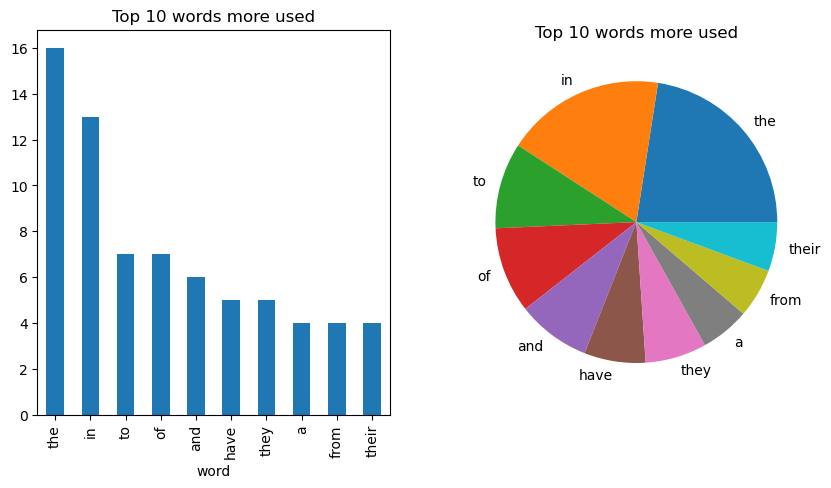

In [6]:
# Import library for plotting results
import matplotlib.pyplot as plt

# Create histograma & pie plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
freq_df[:10].plot(kind="bar", x="word", y="freq", ax=ax[0], legend=False)
freq_df[:10].plot(kind="pie", y="freq", labels=freq_df["word"], ax=ax[1], legend=False)
ax[0].set_title("Top 10 words more used")
ax[1].set_title("Top 10 words more used")
ax[1].set_ylabel("")

# Show plots
plt.show()

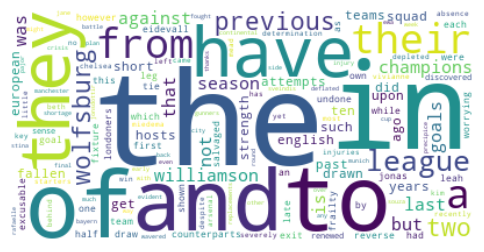

In [7]:
# Import wordcloud library
from wordcloud import WordCloud

# Create the wordcloud object
wordcloud = WordCloud(background_color="white").generate_from_frequencies(FreqDist(article_tokw))

# Show wordcloud
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Exercici 2
> Treu les stopwords i realitza stemming al teu conjunt de dades.

Seguirem amb els següents passos del preproceesat de text aplicant **stopwords i stemming & lemmatization**

In [8]:
# Eliminate stop words
article_tokw = [token for token in article_tokw if token not in stopwords.words("english")]

# Recalcualate frequence of words without stop words
freq = FreqDist(article_tokw)

# Df of words frequency uploaded
freq_df = pd.DataFrame(FreqDist(article_tokw).items(), columns=["word", "freq"]).sort_values(by="freq", ascending=False)
freq_df

,word,freq
10,league,3
41,williamson,2
23,season,2
36,goals,2
9,champions,2
...,...,...
42,jonas,1
40,leah,1
39,goal,1
38,one,1


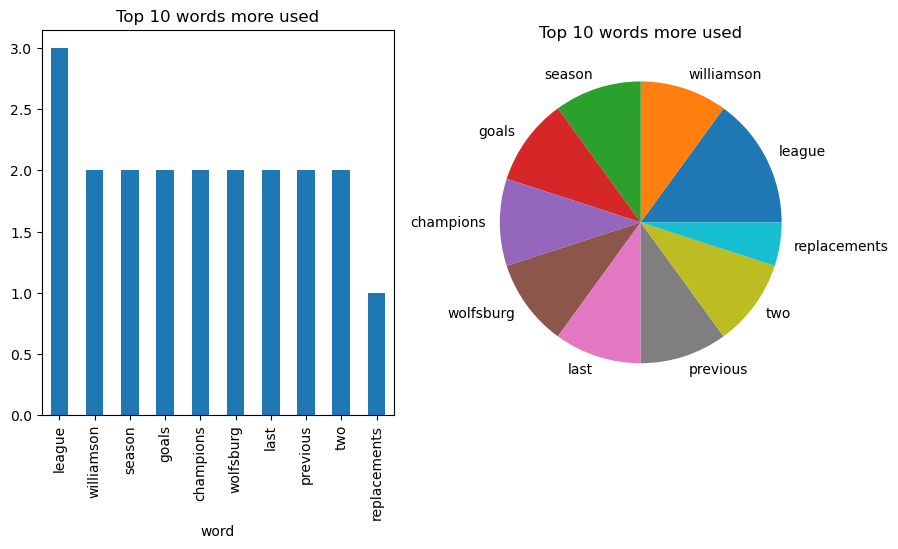

In [9]:
# Import library for plotting results without stop words
import matplotlib.pyplot as plt

# Create histograma & pie plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
freq_df[:10].plot(kind="bar", x="word", y="freq", ax=ax[0], legend=False)
freq_df[:10].plot(kind="pie", y="freq", labels=freq_df["word"], ax=ax[1], legend=False)
ax[0].set_title("Top 10 words more used")
ax[1].set_title("Top 10 words more used")
ax[1].set_ylabel("")

# show plots
plt.show()

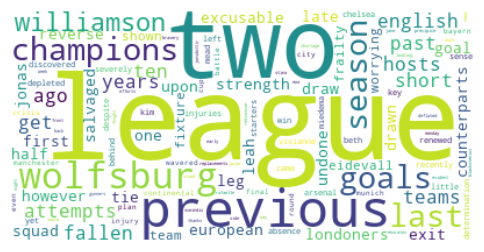

In [10]:
# Create the wordcloud object without stop words
wordcloud = WordCloud(background_color="white").generate_from_frequencies(FreqDist(article_tokw))

# show wordcloud
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

_el text s'ha quedat ja amb nomes 121 paraules no repetides i en que la més repetida és league i només 3 vegades_
Podem veure en les diferents visualitzacions com han cambiat les paraules, sobretot a la repetició de paraules. També veiem que les paraules que veiem al wordcloud totes tenen significat, no son trivials.

**Seguim amb el següent pas del preprocessat que és stemming & lemmatization**

In [11]:
# Stemming
stemming = PorterStemmer()
stemmed_words=[]
for w in article_tokw :
    stemmed_words.append(stemming.stem(w))

# Lemmatization
lemma = WordNetLemmatizer()
lemma_words=[]
for w in article_tokw:
    lemma_words.append(lemma.lemmatize(w,"v"))

# Show the changes did to the text    
print("\033[1mPreproceed article\033[0m \n", article_tokw, "\n\n")    
print("\033[1mStemmed article\033[0m \n",stemmed_words, "\n\n")
print("\033[1mLemmatizate article\033[0m \n",lemma_words)

Preproceed article 
 ['hosts', 'fallen', 'short', 'two', 'previous', 'attempts', 'get', 'past', 'wolfsburg', 'champions', 'league', 'ten', 'years', 'ago', 'english', 'teams', 'strength', 'drawn', 'upon', 'squad', 'european', 'counterparts', 'last', 'season', 'exit', 'however', 'excusable', 'londoners', 'salvaged', 'draw', 'late', 'first', 'leg', 'reverse', 'tie', 'undone', 'goals', 'half', 'one', 'goal', 'leah', 'williamson', 'jonas', 'eidevall', 'team', 'shown', 'worrying', 'frailty', 'fixture', 'season', 'discovered', 'renewed', 'sense', 'determination', 'despite', 'absence', 'key', 'starters', 'injuries', 'beth', 'mead', 'vivianne', 'miedema', 'kim', 'little', 'recently', 'williamson', 'left', 'arsenal', 'severely', 'depleted', 'yet', 'came', 'behind', 'win', 'chelsea', 'continental', 'cup', 'final', 'manchester', 'city', 'league', 'bayern', 'munich', 'previous', 'round', 'champions', 'league', 'wavered', 'battle', 'plan', 'even', 'injury', 'crisis', 'shortage', 'replacements', 'muc

# Exercici 3
> Realitza sentiment analysis al teu conjunt de dades.

Classificarem cada frase per veure quin nivell de sentiment té. Positiu, negatiu o neutre o bé compost

Primer ho farem amb el **lexicon-based**

In [12]:
# Create object with sentiment analyzer
sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores(article)

{'neg': 0.11, 'neu': 0.804, 'pos': 0.086, 'compound': -0.552}

_podem veure els percentantges del text original sense preprocessat, ens fa entendre que el text sembla neutral en la seva majoria i en tot cas te més sentiment negatiu que positiu_

Ara anem a veure com es comporta **frase a frase*

In [13]:
# Create an objecte for sentiment analysis
article_sentiment = SentimentIntensityAnalyzer()

# Create new df with the sentence of the article
article_analysis = pd.DataFrame(article_toks, columns=["sentence"])
article_analysis

,sentence
0,The hosts have fallen short in two previous at...
1,"Ten years ago, in the 2012/13 semi-finals, Eng..."
2,"Last season's exit, however, isn't as excusable."
3,While the Londoners salvaged a 1-1 draw late i...
4,Jonas Eidevall's team had shown a worrying fra...
5,"No Beth Mead, Vivianne Miedema, Kim Little, an..."
6,"And yet, they came from behind to win against ..."
7,"They have not wavered from their battle plan, ..."
8,That much was evident last week in Wolfsburg.
9,Two early goals from Ewa Pajor and Sveindis Ja...


In [14]:
# Create columns with the score of the sentences
article_analysis["positive"] = [article_sentiment.polarity_scores(i)["pos"] for i in article_analysis["sentence"]]
article_analysis["negative"] = [article_sentiment.polarity_scores(i)["neg"] for i in article_analysis["sentence"]]
article_analysis["neutral"] = [article_sentiment.polarity_scores(i)["neu"] for i in article_analysis["sentence"]]
article_analysis["compound"] = [article_sentiment.polarity_scores(i)["compound"] for i in article_analysis["sentence"]]

# Show df
article_analysis

,sentence,positive,negative,neutral,compound
0,The hosts have fallen short in two previous at...,0.163,0.120,0.718,0.2263
1,"Ten years ago, in the 2012/13 semi-finals, Eng...",0.000,0.107,0.893,-0.3875
2,"Last season's exit, however, isn't as excusable.",0.000,0.000,1.000,0.0000
3,While the Londoners salvaged a 1-1 draw late i...,0.000,0.000,1.000,0.0000
4,Jonas Eidevall's team had shown a worrying fra...,0.114,0.054,0.832,0.4310
5,"No Beth Mead, Vivianne Miedema, Kim Little, an...",0.000,0.271,0.729,-0.6369
6,"And yet, they came from behind to win against ...",0.199,0.000,0.801,0.8020
7,"They have not wavered from their battle plan, ...",0.000,0.469,0.531,-0.8885
8,That much was evident last week in Wolfsburg.,0.000,0.000,1.000,0.0000
9,Two early goals from Ewa Pajor and Sveindis Ja...,0.000,0.000,1.000,0.0000


In [15]:
# Create a new column of sentiment between -1, 0 or 1
sentiment = []
for i in article_analysis["compound"].values:
    if i >= 0.05:
        sentiment.append("postive") 
    elif i <= -0.05:
        sentiment.append("negative") 
    else:
        sentiment.append("neutral") 

article_analysis["sentiment"] = sentiment

# Show df
article_analysis

,sentence,positive,negative,neutral,compound,sentiment
0,The hosts have fallen short in two previous at...,0.163,0.120,0.718,0.2263,postive
1,"Ten years ago, in the 2012/13 semi-finals, Eng...",0.000,0.107,0.893,-0.3875,negative
2,"Last season's exit, however, isn't as excusable.",0.000,0.000,1.000,0.0000,neutral
3,While the Londoners salvaged a 1-1 draw late i...,0.000,0.000,1.000,0.0000,neutral
4,Jonas Eidevall's team had shown a worrying fra...,0.114,0.054,0.832,0.4310,postive
5,"No Beth Mead, Vivianne Miedema, Kim Little, an...",0.000,0.271,0.729,-0.6369,negative
6,"And yet, they came from behind to win against ...",0.199,0.000,0.801,0.8020,postive
7,"They have not wavered from their battle plan, ...",0.000,0.469,0.531,-0.8885,negative
8,That much was evident last week in Wolfsburg.,0.000,0.000,1.000,0.0000,neutral
9,Two early goals from Ewa Pajor and Sveindis Ja...,0.000,0.000,1.000,0.0000,neutral


In [16]:
# Statitscal Summary
article_analysis.describe().T

,count,mean,std,min,25%,50%,75%,max
positive,12.0,0.065250,0.082946,0.0000,0.000000,0.000,0.144250,0.199
negative,12.0,0.095833,0.144159,0.0000,0.000000,0.027,0.122250,0.469
neutral,12.0,0.839000,0.150453,0.5310,0.726250,0.847,1.000000,1.000
compound,12.0,0.022217,0.478124,-0.8885,-0.096875,0.000,0.277475,0.802


_aquí m'interessava veure la mean per veure com es comporten les frases. A priori sembla que es manté la neutralitat de sentiment en el text. És interessant a veure-ho en una noticia esportiva "favorable" a un equip per veure si hi influeix o si realment és neutre_

In [17]:
# Categoric summary
article_analysis.describe(include="O").T

,count,unique,top,freq
sentence,12,12,The hosts have fallen short in two previous at...,1
sentiment,12,3,postive,5


_aqui m'interessava veure quin sentiment era el més repetit. Sorprèn que predomini el sentiment positiu per damunt del neutral ja que quan ho miravem paraula per paraula guanyava la neutralitat amb molta diferencia_

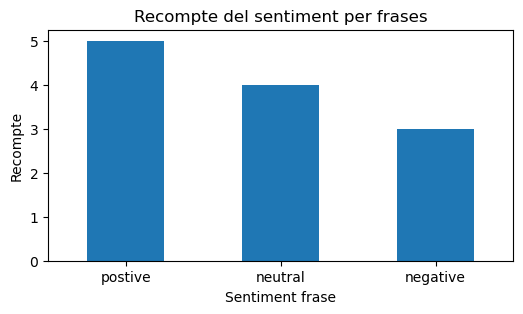

In [18]:
plt.figure(figsize=(6,3))
article_analysis['sentiment'].value_counts().plot(kind='bar')
plt.title("Recompte del sentiment per frases")
plt.xlabel("Sentiment frase")
plt.ylabel("Recompte")
plt.xticks(rotation=0)
plt.show()

_amb el grafic veiem el recompte de com s'ha classificat cada frase. Molt similar totes les frases. 5 positives, 4 neutrals i 3 negatives. Podriem revisar frase a frase si ho ha fet de manera correcta o el perquè_

A continuació mirarem de fer un analisis més extens a través de ML per millorar la precisió amb el model **Bow (Bag of Words)**
Els passos a fer son:
1. Preprocessat
2. Separar la dada en train/test
3. Veure com es comporten diferents models amb Cross Validation

Com que la nostra data és text i no númeric no te gaire sentit utilitzar random_state per mantenir sempre la mateixa partició de les dades, per aquest motiu utilitzarem **CrossValidation** per calcular l'accuracy així serà més precisa i semblan cada cop que executem el codi al fer-ho en 5 particions. 

In [19]:
# Import libraries needed to preprocess text data
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to have only words and numbers data
token = RegexpTokenizer(r"[a-zA-Z0-9]+")

# Create an object with the parameters we need to preprocess text
count_vec = CountVectorizer(lowercase=True, stop_words="english", ngram_range = (1,1), tokenizer = token.tokenize)

# Apply Count Vectorizer to clean 
article_bow= count_vec.fit_transform(article_analysis['sentence'])

In [20]:
# Import libraries needed to split text data
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split data to train and test subsets
X_train, X_test, y_train, y_test = train_test_split(article_bow, article_analysis["sentiment"], test_size=0.2, random_state=42)

In [21]:
# Import libraries needed to creat models
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

# Create dict with models
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=100),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

# Create a bucle to calculate the acurracy of each model
for name, sklearn_classifier in classifiers.items():
    scores = cross_val_score(sklearn_classifier, article_bow, article_analysis["sentiment"], cv=5)
    print(name, "- Accuracy:", scores.mean())

BernoulliNB - Accuracy: 0.2333333333333333
ComplementNB - Accuracy: 0.5
MultinomialNB - Accuracy: 0.4
KNeighborsClassifier - Accuracy: 0.3333333333333333
DecisionTreeClassifier - Accuracy: 0.16666666666666666
RandomForestClassifier - Accuracy: 0.26666666666666666
LogisticRegression - Accuracy: 0.3333333333333333
MLPClassifier - Accuracy: 0.36666666666666664
AdaBoostClassifier - Accuracy: 0.3333333333333333


_veiem que amb la utilització de CV = 5 obtenim una accuracy mitja bastant baixa en la majoria de models. _ComplementNB_ sembla el millor model amb un 0.5 però anem a mirar que passa si utilitzem **TF-IDF**

TF-IDF (Term Frequency-Inverse Document Frequency) serveis per mesura la importancia de cada paraula en un text en relació a una col·lecció de textos. 

TF -> Son els cops que una paraula apareix en un text específic.   
IDF -> mesura la rararesa d'una paraula. És a dir com tingui un valor més elevat significa que la paraula apareix en pocs texts i si te un valor baix, significara que apareix en més. 

La combinació dona un pes esepcific per cada paraula en cada text. Si apareix en un text especific però extranyament en altres tindrà un valor alt, i vicersa. 

In [23]:
# Import libraries needed for TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
article_tf= tf.fit_transform(article_analysis["sentence"])

# Split againt into train and test
X_train, X_test, y_train, y_test = train_test_split(article_tf, article_analysis["sentiment"], test_size=0.2)

# Recall models to avoid overfitting
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=100),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

# Evaluate each classifier using 10-fold cross-validation
for name, sklearn_classifier in classifiers.items():
    scores = cross_val_score(sklearn_classifier, article_tf, article_analysis["sentiment"], cv=5)
    print(name, "- Accuracy:", scores.mean())


BernoulliNB - Accuracy: 0.6666666666666666
ComplementNB - Accuracy: 0.7666666666666666
MultinomialNB - Accuracy: 0.4333333333333333
KNeighborsClassifier - Accuracy: 0.5
DecisionTreeClassifier - Accuracy: 0.4333333333333333
RandomForestClassifier - Accuracy: 0.7
LogisticRegression - Accuracy: 0.4333333333333333
MLPClassifier - Accuracy: 0.6
AdaBoostClassifier - Accuracy: 0.5333333333333333


_podem observar com tots els models obtenen millors resultats, amb uns quants models per sobre del 0.5. Ens queadrem amb **Complement NB amb TF-IDF** ja que és el que ha donat millor resultat amb les dos tècniques de NLP._ 